In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanAbsoluteError

# Load data from the CSV file
df = pd.read_csv('dataset_carla.csv')

# Preprocess the data (e.g., handle missing values, scale features, etc.)
# Example:
df.dropna(inplace=True)  # Drop rows with missing values
X = df.drop('Theta', axis=1)  # Features
y = df['Theta']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define neural network architecture
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),# Hidden layers
    Dense(1, activation='linear')  # Output layer
])


# Compile the model
metrics=[MeanAbsoluteError()]
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=metrics)

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Save the trained model
model.save('tilt_model.h5')

# Function to predict theta value based on mass and radius of curvature
def predict_theta(model,speed, cof,radius_of_curvature, mass):
    # Prepare input data for prediction
    input_data = np.array([[speed, cof,radius_of_curvature,mass]])

    # Make prediction
    prediction = model.predict(input_data)

    return prediction[0][0]  # Assuming single prediction

# Example usage:
# Load the trained model
model = load_model('tilt_model.h5')

# Let's say you want to predict theta for mass=100 kg, radius_of_curvature=10 m, and additional features
mass = 51.6  # kg
radius_of_curvature = 2  # m
cof=0.8
speed=0.348


predicted_theta = np.abs(predict_theta(model, speed, cof, radius_of_curvature,mass))
print("Predicted Theta:", predicted_theta)


Epoch 1/10
35/35 [==============================] - 8s 23ms/step - loss: 0.7223 - mean_absolute_error: 0.7223 - val_loss: 0.4512 - val_mean_absolute_error: 0.4512
Epoch 2/10
35/35 [==============================] - 0s 5ms/step - loss: 0.4520 - mean_absolute_error: 0.4520 - val_loss: 0.4185 - val_mean_absolute_error: 0.4185
Epoch 3/10
35/35 [==============================] - 0s 5ms/step - loss: 0.3787 - mean_absolute_error: 0.3787 - val_loss: 0.6835 - val_mean_absolute_error: 0.6835
Epoch 4/10
35/35 [==============================] - 0s 5ms/step - loss: 0.3643 - mean_absolute_error: 0.3643 - val_loss: 0.5146 - val_mean_absolute_error: 0.5146
Epoch 5/10
35/35 [==============================] - 0s 6ms/step - loss: 0.3115 - mean_absolute_error: 0.3115 - val_loss: 0.2645 - val_mean_absolute_error: 0.2645
Epoch 6/10
35/35 [==============================] - 0s 8ms/step - loss: 0.2779 - mean_absolute_error: 0.2779 - val_loss: 0.2395 - val_mean_absolute_error: 0.2395
Epoch 7/10
35/35 [=========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 137ms/step
Predicted Theta: 1.3051119


In [ ]:
import numpy as np
f_seat = mass*9.8
f_friction = f_seat*cof

formula_theta = np.arctan(f_seat*(speed**2) - f_friction*9.8*radius_of_curvature/(f_seat+f_friction*speed**2))

In [ ]:
error = round(np.abs(formula_theta - predicted_theta),2)
percent_error = round(error*100/formula_theta,2)
print(f'Predicted theta: {predicted_theta}')
print(f'Formula theta: {formula_theta}')
print(f'Absolute error: {error}')
print(f'Percent error = {percent_error}%')

Predicted theta: 1.3093875646591187
Formula theta: 1.5494979435143714
Absolute error: 0.24
Percent error = 15.49%


In [ ]:
from ipywidgets import interact, widgets

def predict_and_calculate_error(mass_value, cof_value, speed_value, radius_value):

    f_seat = mass_value*9.8
    f_friction = f_seat*cof_value
    formula_theta_var = np.arctan(f_seat*(speed_value**2) - f_friction*9.8*radius_value/(f_seat+f_friction*speed_value**2))
    y_true = formula_theta_var

    # Extract the predicted 'Theta' values from the prediction output DataFrame
    y_pred_var = np.abs(predict_theta(model, speed_value, cof_value, radius_value,mass_value))

    # Calculate absolute error
    error = round(np.abs(y_true - y_pred_var),2)
    percent_error = round(error*100/formula_theta_var,2)

    # Print the mean squared error
    print("Mass Value:", mass_value)
    print("Coeffcient of friction Value:", cof_value)
    print("Speed Value:", speed_value)
    print("Radius of curve Value:", radius_value)
    print(f'Predicted theta: {y_pred_var}')
    print(f'Formula theta: {formula_theta_var}')
    print(f"Absolute Error: {error}")
    print(f'Percent error = {percent_error}%')

mass_slider = widgets.FloatSlider(value=70, min=50, max=189, step=0.01, description='Mass Value')
cof_slider = widgets.FloatSlider(value=0.8, min=0.1, max=1, step=0.1, description='Friction coeff.')
speed_slider=widgets.FloatSlider(value=5, min=0, max= 15,step=0.05,description='Speed')
radius_slider=widgets.FloatSlider(value=5, min=1, max= 10,step=1,description='Radius Curve')

# Define an interactive widget
interactive_plot = interact(predict_and_calculate_error, mass_value=mass_slider, cof_value = cof_slider, speed_value=speed_slider, radius_value=radius_slider)

interactive(children=(FloatSlider(value=70.0, description='Mass Value', max=189.0, min=50.0, step=0.01), Float…

1/1 [==============================] - 0s 14ms/step


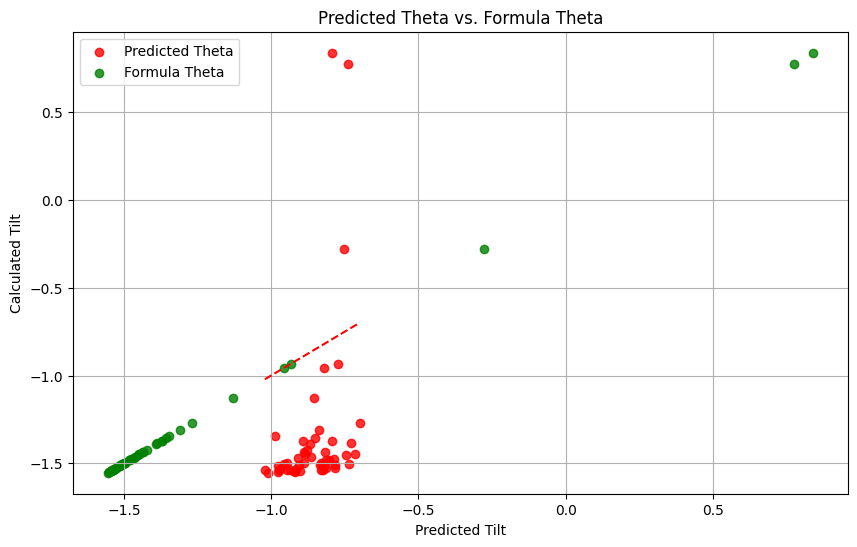

In [ ]:
#predicted vs actual tilt

import numpy as np
import matplotlib.pyplot as plt

# Function to calculate formula theta
def calculate_formula_theta(speed, f_seat, f_friction, radius_of_curvature):
    return np.arctan(f_seat * (speed ** 2) - f_friction * 9.8 * radius_of_curvature / (f_seat + f_friction * speed ** 2))

# Generate random inputs
np.random.seed(42)  # For reproducibility
num_samples = 50
speed_values = np.random.uniform(0.1, 2.0, num_samples)
f_seat_values = np.random.uniform(0.5, 2.0, num_samples)
f_friction_values = np.random.uniform(0.1, 1.0, num_samples)
radius_of_curvature_values = np.random.uniform(1, 10, num_samples)
mass_values = np.random.uniform(50, 100, num_samples)

# Predict theta values using the model
predicted_thetas = np.array([predict_theta(model, speed, cof, radius_of_curvature, mass)
                             for speed, cof, radius_of_curvature, mass in zip(speed_values, f_seat_values, f_friction_values, radius_of_curvature_values)])

# Calculate formula theta values
formula_thetas = np.array([calculate_formula_theta(speed, f_seat, f_friction, radius_of_curvature)
                           for speed, f_seat, f_friction, radius_of_curvature in zip(speed_values, f_seat_values, f_friction_values, radius_of_curvature_values)])

# Plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(predicted_thetas, formula_thetas, color='red', label='Predicted Theta', alpha=0.8)
plt.plot([min(predicted_thetas), max(predicted_thetas)], [min(predicted_thetas), max(predicted_thetas)], color='red', linestyle='--')
plt.scatter(formula_thetas, formula_thetas, color='green', label='Formula Theta', alpha=0.8)
plt.xlabel('Predicted Tilt')
plt.ylabel('Calculated Tilt')
plt.title('Predicted Theta vs. Formula Theta')
plt.legend()
plt.grid(True)
plt.show()


1/1 [==============================] - 0s 13ms/step


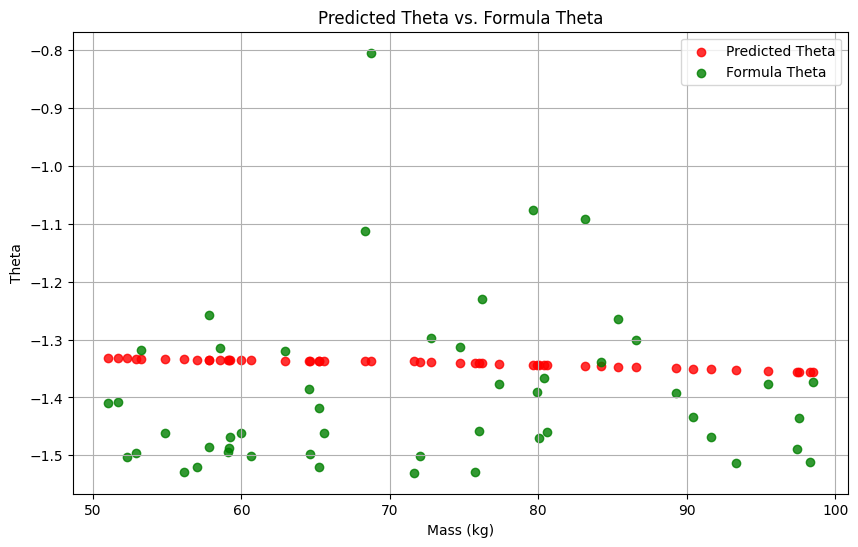

In [ ]:

#variation of mass- predicted vs actual

import numpy as np
import matplotlib.pyplot as plt

# Function to calculate formula theta
def calculate_formula_theta(speed, f_seat, f_friction, radius_of_curvature):
    return np.arctan(f_seat * (speed ** 2) - f_friction * 9.8 * radius_of_curvature / (f_seat + f_friction * speed ** 2))

# Define constant parameters for the prediction
radius_of_curvature = 2  # m
cof = 0.8
speed = 0.348

# Generate random mass values
np.random.seed(42)  # For reproducibility
num_samples = 50
mass_values = np.random.uniform(50, 100, num_samples)

# Predict theta values using the model
predicted_thetas = np.array([predict_theta(model, speed, cof, radius_of_curvature, mass) for mass in mass_values])

# Calculate formula theta values
formula_thetas = np.array([calculate_formula_theta(speed, f_seat, f_friction, radius_of_curvature)
                           for f_seat, f_friction in zip(f_seat_values, f_friction_values)])

# Plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(mass_values, predicted_thetas, color='red', label='Predicted Theta', alpha=0.8)
plt.scatter(mass_values, formula_thetas, color='green', label='Formula Theta', alpha=0.8)
plt.xlabel('Mass (kg)')
plt.ylabel('Theta')
plt.title('Predicted Theta vs. Formula Theta')
plt.legend()
plt.grid(True)
plt.show()
